In [1]:
#import required libs

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from imblearn.over_sampling import SMOTE

In [2]:
#load data as dataframe
df = pd.read_csv('customer_booking.csv', encoding='latin-1')

In [3]:
# display the first five rows
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
#show information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
#check nulls values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
#show summary statistic for numerical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [7]:
#show unique values in num_passengers columns
df.num_passengers.unique()

array([2, 1, 3, 4, 6, 5, 7, 9, 8], dtype=int64)

In [8]:
#show unique values in sales_channel columns
df.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

In [9]:
#show unique values in trip_type columns

df.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [10]:
#show unique values in purchase_lead columns

df.purchase_lead.describe()

count    50000.000000
mean        84.940480
std         90.451378
min          0.000000
25%         21.000000
50%         51.000000
75%        115.000000
max        867.000000
Name: purchase_lead, dtype: float64

In [11]:
#show unique values in length_of_stay columns

df.length_of_stay.describe()

count    50000.00000
mean        23.04456
std         33.88767
min          0.00000
25%          5.00000
50%         17.00000
75%         28.00000
max        778.00000
Name: length_of_stay, dtype: float64

In [12]:
#show unique values in flight_hour columns

df.flight_hour.describe()

count    50000.00000
mean         9.06634
std          5.41266
min          0.00000
25%          5.00000
50%          9.00000
75%         13.00000
max         23.00000
Name: flight_hour, dtype: float64

In [13]:
#show unique values in flight_day columns

df.flight_day.unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [14]:
#show unique values in flight_day columns

df.flight_day.describe()

count     50000
unique        7
top         Mon
freq       8102
Name: flight_day, dtype: object

In [15]:
#show unique values in route columns

df.route.unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [16]:
#show unique values in booking_origin columns

df.booking_origin.unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [17]:
#show unique values in wants_extra_baggage columns

df.wants_extra_baggage.unique()

array([1, 0], dtype=int64)

In [18]:
#show unique values in wants_preferred_seat columns

df.wants_preferred_seat.unique()

array([0, 1], dtype=int64)

In [19]:
#show unique values in flight_duration columns

df.flight_duration.describe()

count    50000.000000
mean         7.277561
std          1.496863
min          4.670000
25%          5.620000
50%          7.570000
75%          8.830000
max          9.500000
Name: flight_duration, dtype: float64

In [20]:
#show unique values in booking_complete columns

df.booking_complete.unique()

array([0, 1], dtype=int64)

# EDA

Percentage Of No Book completeing 0.85044
Percentage Of Book completeing 0.14956


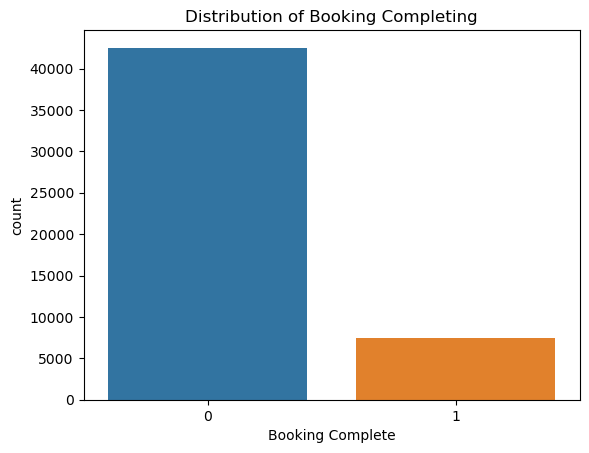

In [21]:
#visualize booking complete column
plt.title('Distribution of Booking Completing')
sns.countplot(data = df, x =df['booking_complete'])
plt.xlabel('Booking Complete');

#calcuate the percentage of values
pct_no_booking_complete =sum(df['booking_complete'] == 0) / len(df['booking_complete'])
pct_booking_complete = sum(df['booking_complete'] == 1) / len(df['booking_complete'])

#show percentage of booking complete
print('Percentage Of No Book completeing {}'.format(pct_no_booking_complete))
print('Percentage Of Book completeing {}'.format(pct_booking_complete))


### percentage of not complete booking is most
*imbalanced data*

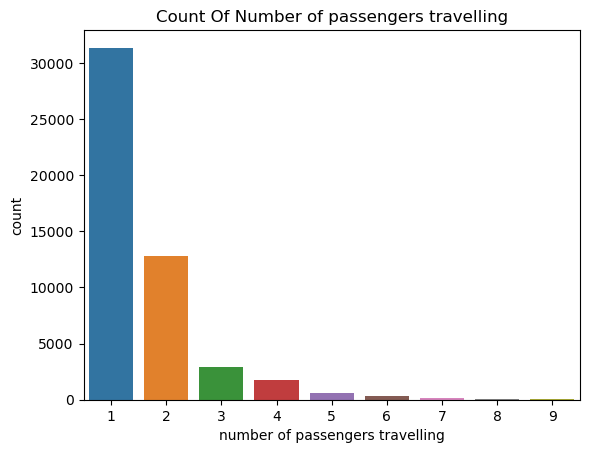

In [22]:
#visualize number of passsengers travelling
plt.title('Count Of Number of passengers travelling')
sns.countplot(data=df, x =df['num_passengers'])
plt.xlabel('number of passengers travelling');

*AS Show 1 passengers is the most*

Percentage Of Booking from Internet 0.88764
Percentage Of Booking from Mobile 0.11236


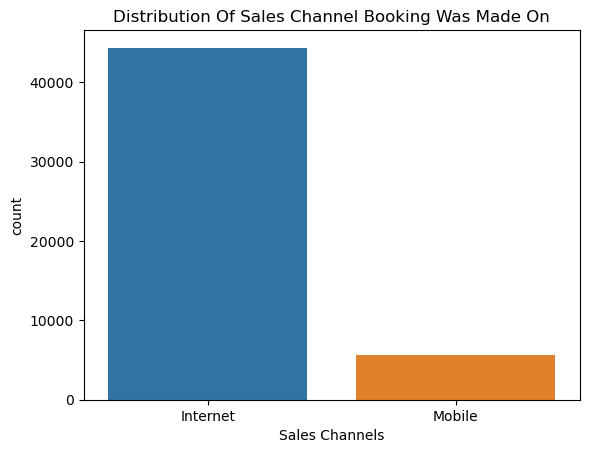

In [23]:
#visualize Sales Channel Booking Was Made On
sns.countplot(data=df, x=df['sales_channel'])
plt.title('Distribution Of Sales Channel Booking Was Made On')
plt.xlabel('Sales Channels');


pct_internet_sales_channel =sum(df['sales_channel'] == 'Internet') / len(df['sales_channel'])
pct_mobile_sales_channel = sum(df['sales_channel'] == "Mobile") / len(df['sales_channel'])
print('Percentage Of Booking from Internet {}'.format(pct_internet_sales_channel))
print('Percentage Of Booking from Mobile {}'.format(pct_mobile_sales_channel))

*Booking from internet is most by percentage of 89%*

Percentage Of Round Trip0.98994
Percentage Of One Way 0.00774
Percentage Of circle Trip 0.00232


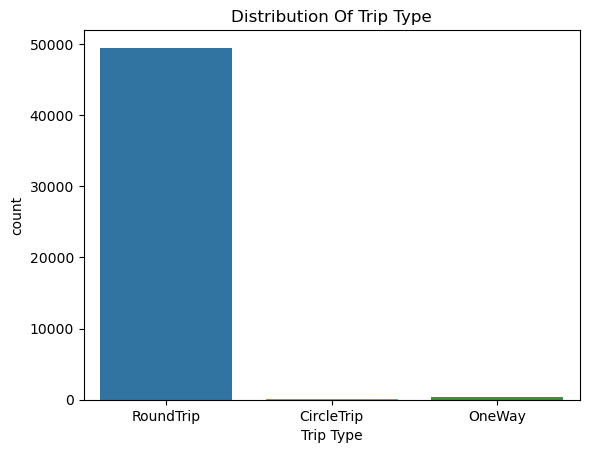

In [24]:
#visualize Trip type Distribution 
sns.countplot(data=df, x=df['trip_type'])
plt.title('Distribution Of Trip Type')
plt.xlabel('Trip Type');

# percentage OF each trip type 
pct_round_trip =sum(df['trip_type'] == 'RoundTrip') / len(df['trip_type'])
pct_one_way = sum(df['trip_type'] == "OneWay") / len(df['trip_type'])
pct_circle_trip = sum(df['trip_type'] == "CircleTrip") / len(df['trip_type'])

# print all percentages of trip type 
print('Percentage Of Round Trip{}'.format(pct_round_trip))
print('Percentage Of One Way {}'.format(pct_one_way))
print('Percentage Of circle Trip {}'.format(pct_circle_trip))


*Round Trip is most by percentage 98%*

Average = 84.94048


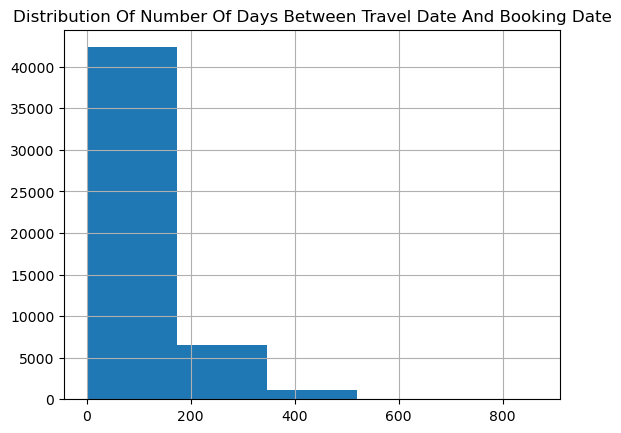

In [25]:
# distribution of number of days between travel date and booking date
plt.title('Distribution Of Number Of Days Between Travel Date And Booking Date')
df.purchase_lead.hist(bins=5);

print("Average =",df.purchase_lead.mean())

*Averge days between travel date and booking date is 84 day, affected by outliers*

94.0


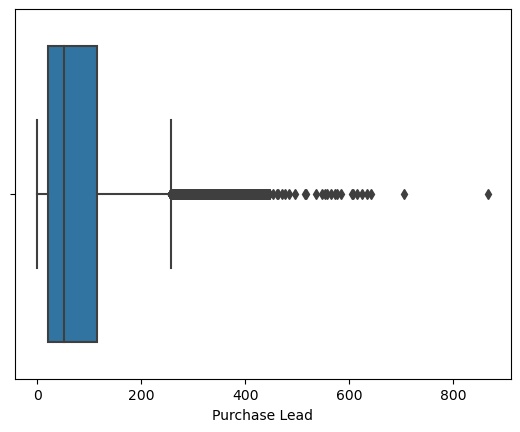

In [26]:
#calcualte and visualize outliers
sns.boxplot(data=df, x=df.purchase_lead)
plt.xlabel('Purchase Lead');

Q1 = df['purchase_lead'].quantile(0.25)
Q3 = df['purchase_lead'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [27]:
#percetage outliers
pct_outlier_in_purchase_lead =  len(df[df['purchase_lead'] >(Q3 + (1.5 * IQR))]) / len(df)
print(pct_outlier_in_purchase_lead)

0.06912


Average of days = 23.04456


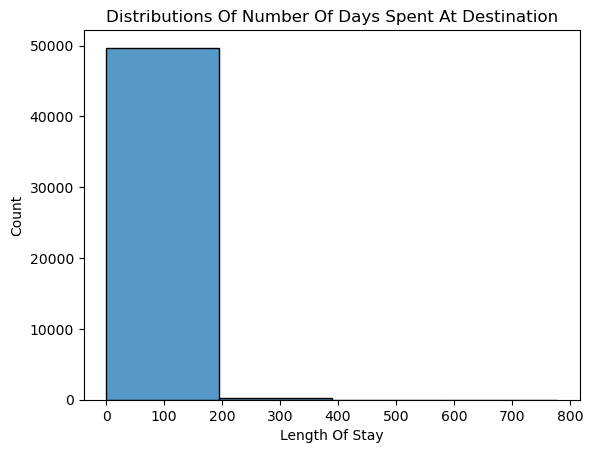

In [28]:
# distribution of numbers Of Days Spent At Destination
sns.histplot(data=df, x=df.length_of_stay, bins=4)
plt.xlabel('Length Of Stay')
plt.title('Distributions Of Number Of Days Spent At Destination');

print("Average of days =",df.length_of_stay.mean())


Inter quantile range = 23.0
0.07614


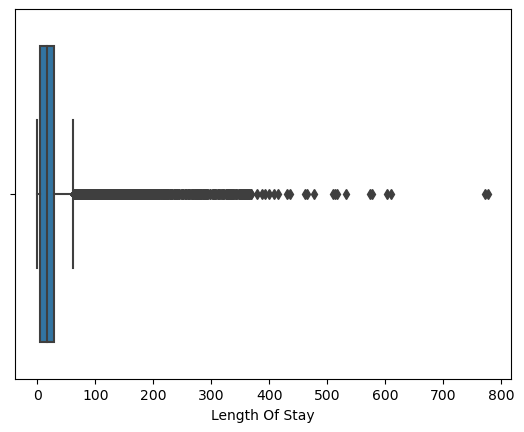

In [29]:
#calcualte and visualize outliers
sns.boxplot(data=df, x=df.length_of_stay)
plt.xlabel('Length Of Stay');
Q1 = df['length_of_stay'].quantile(0.25)
Q3 = df['length_of_stay'].quantile(0.75)
IQR = Q3 - Q1
print("Inter quantile range =",IQR)

#percetage outliers
pct_outlier_in_length_of_stay =  len(df[df['length_of_stay'] >(Q3 + (1.5 * IQR))]) / len(df)
print(pct_outlier_in_length_of_stay)

*Drop outliers in purchase_lead and length_of_stay*

Average of flight hour = 9.06634


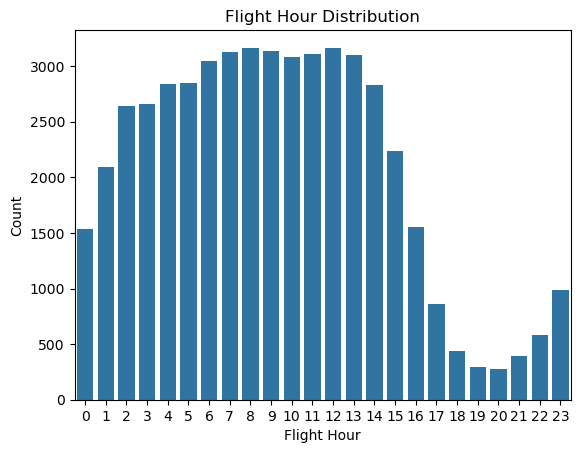

In [30]:
#hour of flight departure
plt.title('Flight Hour Distribution')
sns.countplot(data=df, x = df.flight_hour, color=sns.color_palette()[0])
plt.xlabel('Flight Hour')
plt.ylabel('Count');
print('Average of flight hour =',  df.flight_hour.mean())

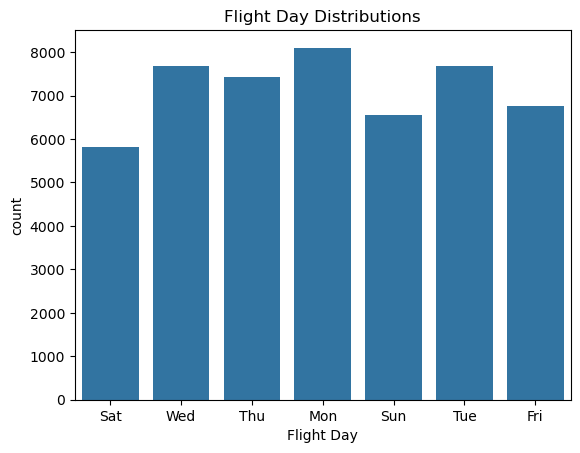

In [31]:
#visualize of flight day distribution
sns.countplot(data=df, x = df.flight_day, color=sns.color_palette()[0])
plt.title('Flight Day Distributions')
plt.xlabel('Flight Day');

In [32]:
# proportion of flight days
print(df.flight_day.value_counts(normalize=True))

Mon    0.16204
Wed    0.15348
Tue    0.15346
Thu    0.14848
Fri    0.13522
Sun    0.13108
Sat    0.11624
Name: flight_day, dtype: float64


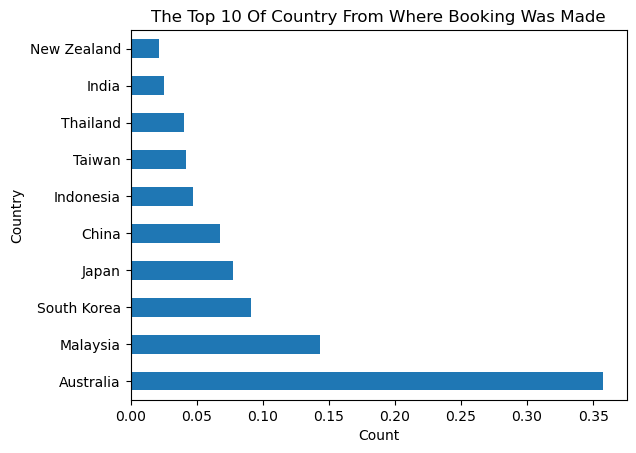

In [33]:
#visualize top 10 freqency in countries
plt.title('The Top 10 Of Country From Where Booking Was Made')
df.booking_origin.value_counts(normalize = True, sort=True)[:10].plot(kind='barh')
plt.ylabel('Country')
plt.xlabel('Count');

percentage of Customers wanted a extra baggage = 0.66878
percentage of Customers not wanted a extra baggage = 0.33122


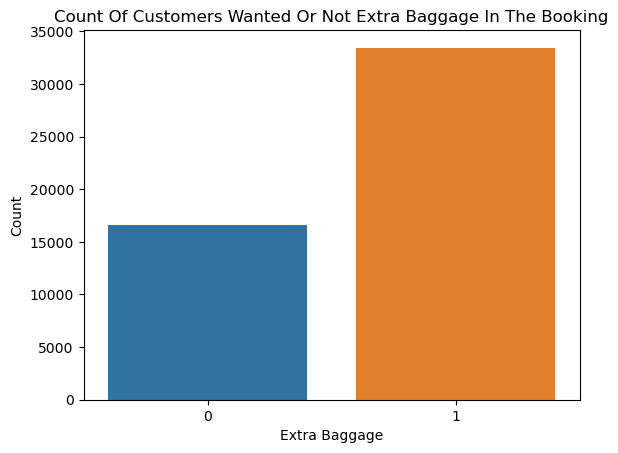

In [34]:
#visaulize count of Of Customers Wanted Or Not Extra Baggage In The Booking
plt.title('Count Of Customers Wanted Or Not Extra Baggage In The Booking')
sns.countplot(data=df, x=df.wants_extra_baggage)
plt.xticks=['No', 'Yes']
plt.xlabel('Extra Baggage')
plt.ylabel('Count');

#print percentage of all
print('percentage of Customers wanted a extra baggage =',sum(df.wants_extra_baggage== 1) /len(df))
print('percentage of Customers not wanted a extra baggage =',sum(df.wants_extra_baggage== 0) /len(df))

percentage of Customers wanted a preferred = 0.29696
percentage of Customers not wanted a preferred seat = 0.70304


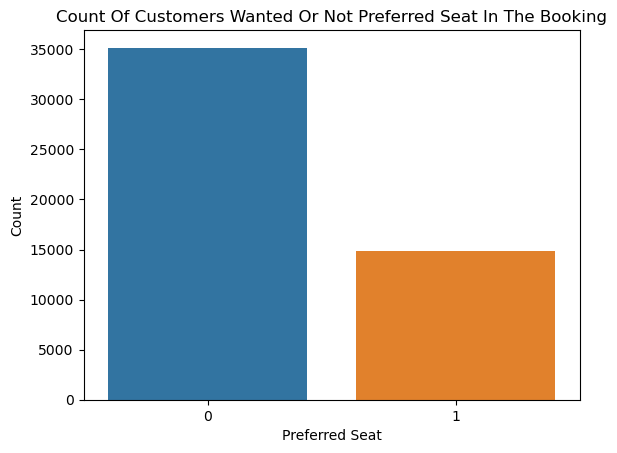

In [35]:
#visaulize Count Of Customers Wanted Or Not Preferred Seat In The Bookin
plt.title('Count Of Customers Wanted Or Not Preferred Seat In The Booking')
sns.countplot(data=df, x=df.wants_preferred_seat)
plt.xticks=['No', 'Yes']
plt.xlabel('Preferred Seat')
plt.ylabel('Count');

#print percentage of all
print('percentage of Customers wanted a preferred =',sum(df.wants_preferred_seat== 1) /len(df))
print('percentage of Customers not wanted a preferred seat =',sum(df.wants_preferred_seat== 0) /len(df))

percentage of Customers Wanted In Flight Meals In The Booking = 0.42714
percentage of Customers not Wanted In Flight Meals In The Booking = 0.57286


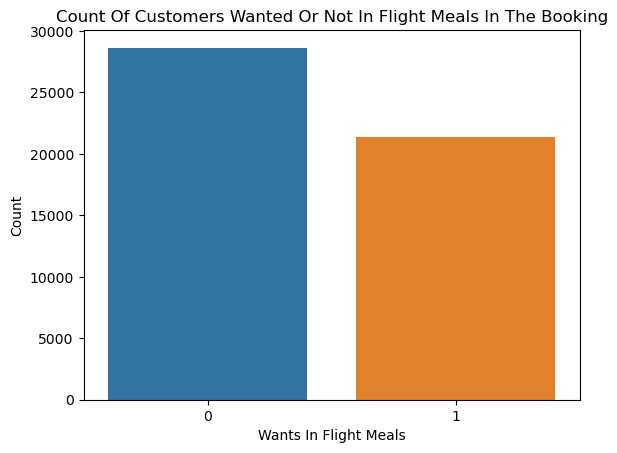

In [36]:
#visualize Customers Wanted Or Not In Flight Meals In The Booking
plt.title('Count Of Customers Wanted Or Not In Flight Meals In The Booking')
sns.countplot(data=df, x=df.wants_in_flight_meals)
plt.xticks=['No', 'Yes']
plt.xlabel('Wants In Flight Meals')
plt.ylabel('Count');



#print percentage of all
print('percentage of Customers Wanted In Flight Meals In The Booking =',sum(df.wants_in_flight_meals== 1) /len(df))
print('percentage of Customers not Wanted In Flight Meals In The Booking =',sum(df.wants_in_flight_meals== 0) /len(df))

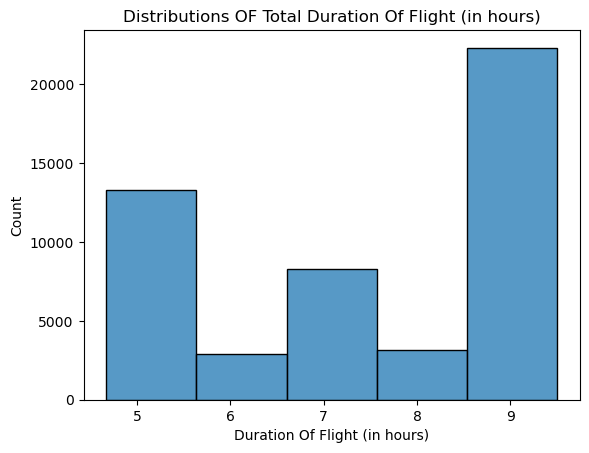

In [37]:
plt.title('Distributions OF Total Duration Of Flight (in hours)')
sns.histplot(data=df,x=df.flight_duration, bins=5)
plt.xlabel('Duration Of Flight (in hours)');


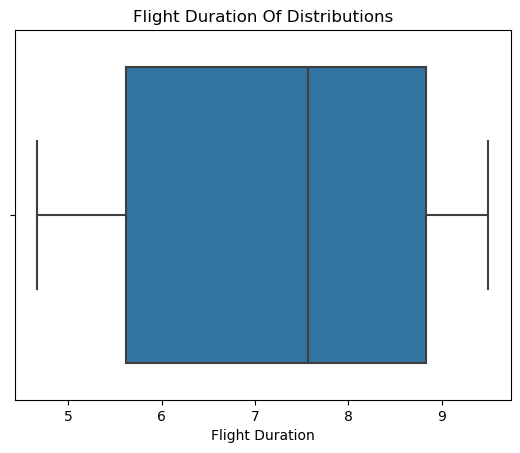

In [38]:
#check outlries
plt.title('Flight Duration Of Distributions')
sns.boxplot(data=df, x=df.flight_duration)
plt.xlabel('Flight Duration');

*there is no outlries*

In [39]:
#show corolations 
df.corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.120404,0.028544,0.022943,-0.063169,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,-0.011434,0.012171,0.013014,-0.002101,0.007127
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.022131,-0.042408,0.007127,0.068139,0.050116,0.026511,-0.106266,1.000000


### IS booking complete dependance on customers want or not want extra baggage?

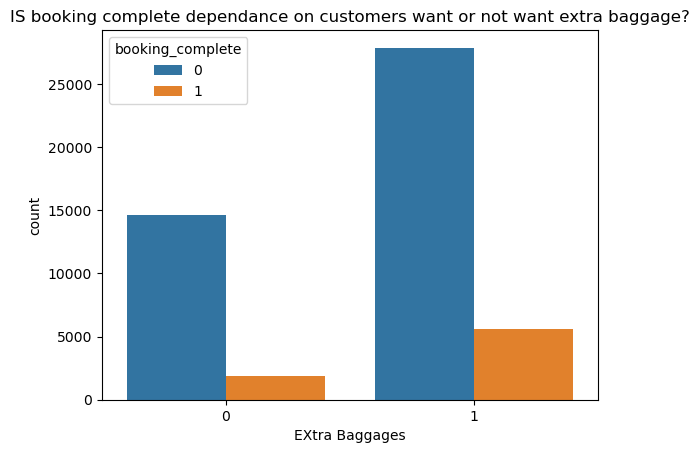

In [40]:
#visualize answer
sns.countplot(data=df, x = df.wants_extra_baggage, hue=df.booking_complete)
plt.title('IS booking complete dependance on customers want or not want extra baggage?')
plt.xlabel('EXtra Baggages');

In [41]:
#calculate percentage 
pct_wants_extra_baggage_and_complete_book =  len(df[(df['wants_extra_baggage'] == 1) & (df['booking_complete'] ==1)]) / len(df['booking_complete'])
pct_not_wants_not_extra_baggage_and_not_complete_book =  len(df[(df['wants_extra_baggage'] == 0) & (df['booking_complete'] ==0)]) / len(df['booking_complete'])
pct_not_wants_extra_baggage_and_complete_book =  len(df[(df['wants_extra_baggage'] == 0) & (df['booking_complete'] ==1)]) / len(df['booking_complete'])
pct_not_wants_extra_baggage_and_not_complete_book =  len(df[(df['wants_extra_baggage'] == 1) & (df['booking_complete'] ==0)]) / len(df['booking_complete'])

#print all percentages 
print("Percentage Of Customers Wants Extra Baggage And Complete Booking = {}".format(pct_wants_extra_baggage_and_complete_book))
print("Percentage Of Customers Not Wants Extra Baggage And Not Complete Booking = {}".format(pct_not_wants_not_extra_baggage_and_not_complete_book))
print("Percentage Of Customers Not Wants Extra Baggage And Complete Booking = {}".format(pct_not_wants_extra_baggage_and_complete_book))
print("Percentage Of Customers Not Wants Extra Baggage And Complete Booking = {}".format(pct_not_wants_extra_baggage_and_not_complete_book))

Percentage Of Customers Wants Extra Baggage And Complete Booking = 0.11146
Percentage Of Customers Not Wants Extra Baggage And Not Complete Booking = 0.29312
Percentage Of Customers Not Wants Extra Baggage And Complete Booking = 0.0381
Percentage Of Customers Not Wants Extra Baggage And Complete Booking = 0.55732


### IS booking complete dependance on customers want or not want in flight meals?

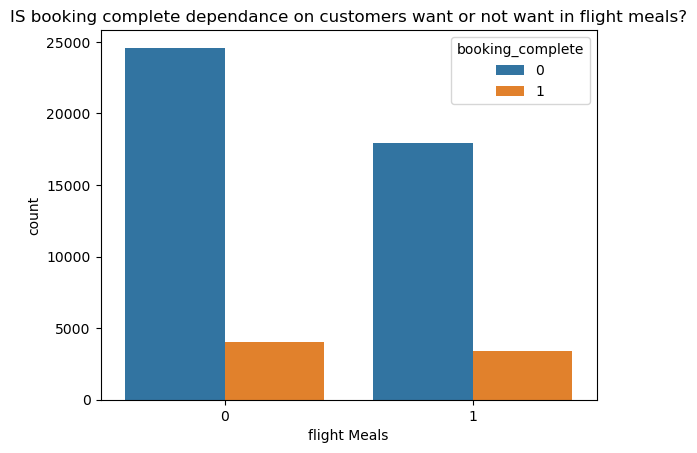

In [42]:
#visualize answer
sns.countplot(data=df, x = df.wants_in_flight_meals, hue=df.booking_complete)
plt.title('IS booking complete dependance on customers want or not want in flight meals?')
plt.xlabel('flight Meals');

In [43]:
#calculate percentage
pct_wants_in_flight_meals_and_complete_book =  len(df[(df['wants_in_flight_meals'] == 1) & (df['booking_complete'] ==1)]) / len(df['booking_complete'])
pct_not_wants_in_flight_mealse_and_not_complete_book =  len(df[(df['wants_in_flight_meals'] == 0) & (df['booking_complete'] ==0)]) / len(df['booking_complete'])
pct_not_wants_in_flight_meals_and_complete_book =  len(df[(df['wants_in_flight_meals'] == 0) & (df['booking_complete'] ==1)]) / len(df['booking_complete'])
pct_not_wants_in_flight_meals_and_not_complete_book =  len(df[(df['wants_in_flight_meals'] == 1) & (df['booking_complete'] ==0)]) / len(df['booking_complete'])

#print all percentage
print("Percentage Of Customers Wants Extra Baggage And Complete Booking = {}".format(pct_wants_in_flight_meals_and_complete_book))
print("Percentage Of Customers Not Wants Extra Baggage And Not Complete Booking = {}".format(pct_not_wants_in_flight_mealse_and_not_complete_book))
print("Percentage Of Customers Not Wants Extra Baggage And Complete Booking = {}".format(pct_not_wants_in_flight_meals_and_complete_book))
print("Percentage Of Customers Not Wants Extra Baggage And Complete Booking = {}".format(pct_not_wants_in_flight_meals_and_not_complete_book))

Percentage Of Customers Wants Extra Baggage And Complete Booking = 0.06856
Percentage Of Customers Not Wants Extra Baggage And Not Complete Booking = 0.49186
Percentage Of Customers Not Wants Extra Baggage And Complete Booking = 0.081
Percentage Of Customers Not Wants Extra Baggage And Complete Booking = 0.35858


### IS booking complete dependance on sales channel?

Percentage Of Customers Complete Booking From Mobile= 0.01218
Percentage Of Customers Not Complete Booking From Mobile = 0.10018
Percentage Of Customers Complete Booking From Internet = 0.13738
Percentage Of Customers Not Complete Booking From Internet = 0.75026


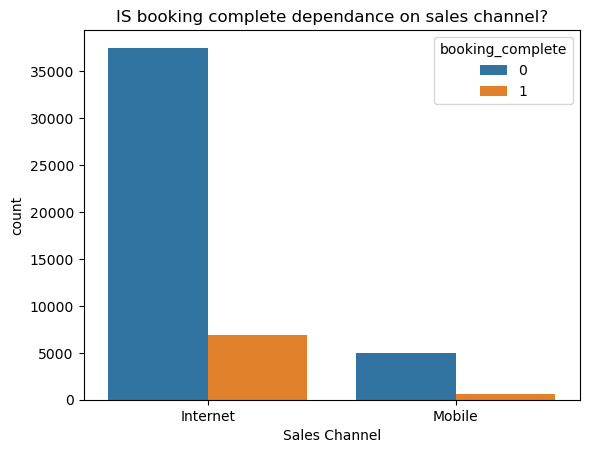

In [44]:
#show answer
sns.countplot(data=df, x = df.sales_channel, hue=df.booking_complete)
plt.title('IS booking complete dependance on sales channel?')
plt.xlabel('Sales Channel');

#calculate percentage
pct_mobile_sales_channel_and_complete_book =  len(df[(df['sales_channel'] == "Mobile") & (df['booking_complete'] ==1)]) / len(df['booking_complete'])
pct_mobile_sales_channel_and_not_complete_book =  len(df[(df['sales_channel'] == 'Mobile') & (df['booking_complete'] ==0)]) / len(df['booking_complete'])
pct_internet_sales_channel_and_complete_book =  len(df[(df['sales_channel'] == "Internet") & (df['booking_complete'] ==1)]) / len(df['booking_complete'])
pct_internet_sales_channel_and_not_complete_book =  len(df[(df['sales_channel'] == 'Internet') & (df['booking_complete'] ==0)]) / len(df['booking_complete'])

#print all percentage
print("Percentage Of Customers Complete Booking From Mobile= {}".format(pct_mobile_sales_channel_and_complete_book))
print("Percentage Of Customers Not Complete Booking From Mobile = {}".format(pct_mobile_sales_channel_and_not_complete_book))
print("Percentage Of Customers Complete Booking From Internet = {}".format(pct_internet_sales_channel_and_complete_book))
print("Percentage Of Customers Not Complete Booking From Internet = {}".format(pct_internet_sales_channel_and_not_complete_book))


### IS booking complete dependance on trip type?

percentage round trip and complete =  14.906
percentage circle trip and complete =  0.01
percentage one way and complete =  0.04
percentage round trip and not complete =  84.088
percentage circle trip and not complete =  0.22200000000000003
percentage one way and not complete =  0.734


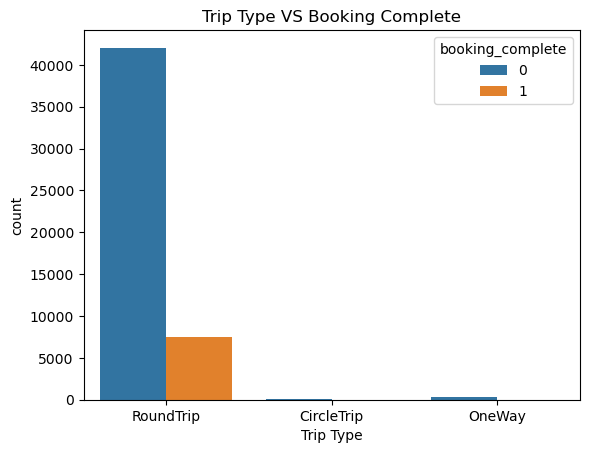

In [45]:
#calculate percenage of booking completre
pct_round_trip_and_complete_book =  len(df[(df['trip_type'] == "RoundTrip") & (df['booking_complete'] ==1)]) / len(df['booking_complete'])
pct_circle_trip_and_complete_book =  len(df[(df['trip_type'] == 'CircleTrip') & (df['booking_complete'] ==1)]) / len(df['booking_complete'])
pct_one_way_and_complete_book =  len(df[(df['trip_type'] == "OneWay") & (df['booking_complete'] ==1)]) / len(df['booking_complete'])
pct_round_trip_and_not_complete_book =  len(df[(df['trip_type'] == "RoundTrip") & (df['booking_complete'] ==0)]) / len(df['booking_complete'])
pct_circle_trip_and_not_complete_book =  len(df[(df['trip_type'] == 'CircleTrip') & (df['booking_complete'] ==0)]) / len(df['booking_complete'])
pct_one_way_and_not_complete_book =  len(df[(df['trip_type'] == "OneWay") & (df['booking_complete'] ==0)]) / len(df['booking_complete'])


#percentage of all  trip type and booking complete
print('percentage round trip and complete = ',pct_round_trip_and_complete_book*100)
print('percentage circle trip and complete = ', pct_circle_trip_and_complete_book*100)
print('percentage one way and complete = ', pct_one_way_and_complete_book*100)

#percentage of all trip type and not booking complete
print('percentage round trip and not complete = ',pct_round_trip_and_not_complete_book*100)
print('percentage circle trip and not complete = ', pct_circle_trip_and_not_complete_book*100)
print('percentage one way and not complete = ', pct_one_way_and_not_complete_book*100)

#visualize answer
plt.title('Trip Type VS Booking Complete')
sns.countplot(data=df, x = df.trip_type, hue=df.booking_complete)
plt.xlabel('Trip Type');


### is booking complete depandced on purchase Lead ?

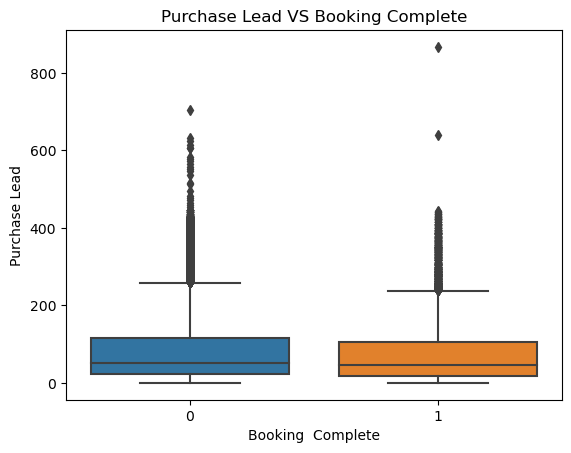

In [46]:
# visualize answer 
plt.title('Purchase Lead VS Booking Complete')
sns.boxplot(data=df, y=df.purchase_lead, x=df.booking_complete)
plt.ylabel('Purchase Lead')
plt.xlabel('Booking  Complete');

# Preprocessing After EDA


### Columns Drop it 

- `booking_origin`
- `route`

### Columns Convert From Categorical To  Continous
- `flight_day`
- `sales_channel` 
- `trip_type` make it binary and then convert it to 0/1 (1 for round trip, 0 for other)


### drop outliers from 
- `purchase_lead`
- `length_of_stay`

In [47]:
# drop unusefull columns
df.drop(columns=['booking_origin', 'route'], inplace=True)

In [48]:
# drop outlier from column
df.drop(df[df['purchase_lead'] >(Q3 + (1.5 * IQR))].index, inplace=True)

In [49]:
# drop outlier from column
df.drop(df[df['length_of_stay'] >(Q3 + (1.5 * IQR))].index, inplace=True)

In [50]:
#convert 
df  = pd.get_dummies(data=df,columns =['sales_channel'], drop_first=True)

In [51]:
mapping = {
    "Mon": 3,
    "Tue": 4,
    "Wed": 5,
    "Thu": 6,
    "Fri": 7,
    "Sat": 1,
    "Sun": 2,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [52]:
mapping = {
   'RoundTrip':1,
    'OneWay':0,
    'CircleTrip':0
}

df["trip_type"] = df["trip_type"].map(mapping)

In [73]:
df["trip_type"].dtype

dtype('int64')

In [53]:
#check changes
df.columns

Index(['num_passengers', 'trip_type', 'purchase_lead', 'length_of_stay',
       'flight_hour', 'flight_day', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'sales_channel_Mobile'],
      dtype='object')

In [54]:
df['purchase_lead'] = df['purchase_lead'] / max(df['purchase_lead']) 
df['length_of_stay'] = df['length_of_stay'] / max(df['length_of_stay'])
df['flight_hour'] =df['flight_hour']  / max(df['flight_hour'] )
#df['num_passengers'] =df['num_passengers']  / max(df['num_passengers'] )

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,25668.0,1.442613,0.894185,1.00,1.000000,1.000000,2.000000,9.0
trip_type,25668.0,0.990689,0.096046,0.00,1.000000,1.000000,1.000000,1.0
purchase_lead,25668.0,0.432604,0.283440,0.00,0.193548,0.403226,0.661290,1.0
length_of_stay,25668.0,0.248887,0.232118,0.00,0.080645,0.096774,0.387097,1.0
flight_hour,25668.0,0.389294,0.232717,0.00,0.217391,0.391304,0.565217,1.0
flight_day,25668.0,4.196704,1.916212,1.00,3.000000,4.000000,6.000000,7.0
wants_extra_baggage,25668.0,0.639356,0.480197,0.00,0.000000,1.000000,1.000000,1.0
wants_preferred_seat,25668.0,0.289933,0.453740,0.00,0.000000,0.000000,1.000000,1.0
wants_in_flight_meals,25668.0,0.413160,0.492411,0.00,0.000000,0.000000,1.000000,1.0
flight_duration,25668.0,7.140392,1.522957,4.67,5.620000,7.000000,8.830000,9.5


In [56]:
df.corr()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile
num_passengers,1.000000,-0.001459,0.118293,-0.127848,0.010936,-0.019163,0.131682,0.036689,0.024341,-0.079327,0.033915,0.003397
trip_type,-0.001459,1.000000,-0.010680,0.021760,-0.004627,0.002755,-0.017059,0.005627,0.008028,-0.046581,0.027845,0.013795
purchase_lead,0.118293,-0.010680,1.000000,0.033041,0.041183,-0.022640,0.063317,0.018014,0.028741,0.055658,-0.020363,-0.004036
length_of_stay,-0.127848,0.021760,0.033041,1.000000,-0.046535,0.009299,0.264431,-0.008607,0.095868,0.113650,-0.080395,-0.071717
flight_hour,0.010936,-0.004627,0.041183,-0.046535,1.000000,-0.008796,-0.014735,0.018146,0.012793,-0.002922,0.004083,0.024868
flight_day,-0.019163,0.002755,-0.022640,0.009299,-0.008796,1.000000,-0.004620,-0.018277,-0.002438,-0.013818,0.006124,-0.017856
wants_extra_baggage,0.131682,-0.017059,0.063317,0.264431,-0.014735,-0.004620,1.000000,0.200433,0.194202,0.037611,0.072711,-0.041892
wants_preferred_seat,0.036689,0.005627,0.018014,-0.008607,0.018146,-0.018277,0.200433,1.000000,0.324039,0.089580,0.056842,0.041232
wants_in_flight_meals,0.024341,0.008028,0.028741,0.095868,0.012793,-0.002438,0.194202,0.324039,1.000000,0.149473,0.025212,-0.020889
flight_duration,-0.079327,-0.046581,0.055658,0.113650,-0.002922,-0.013818,0.037611,0.089580,0.149473,1.000000,-0.122857,-0.031996


In [68]:
X = df.drop(columns=['booking_complete']).values
y = df['booking_complete'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 21572, 1: 4096})
Counter({0: 21572, 1: 4096})


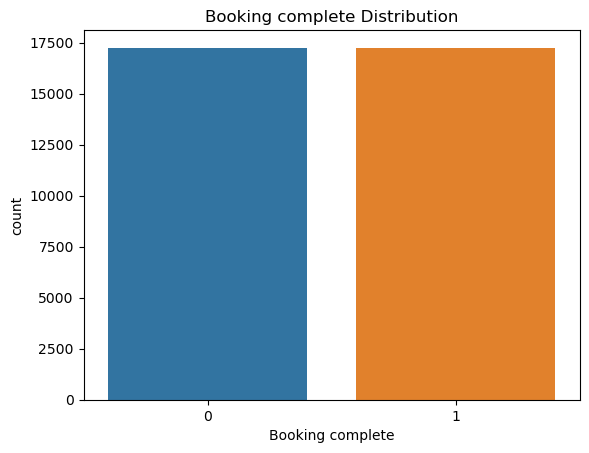

In [59]:
plt.title('Booking complete Distribution')
plt.xlabel('Booking complete')
sns.countplot(data=df, x=y_train);

In [60]:
def confusionmatrix(predictions):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()
def eval_classification(model):
    #print(len(x_test), 'x_test')
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)

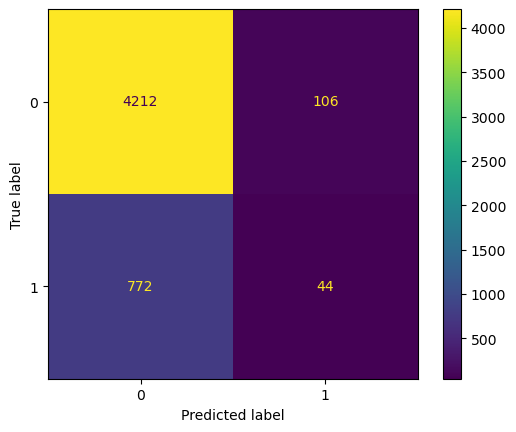

In [61]:
params = {
            'objective':'binary:logistic',
            'max_depth': 10,
            'learning_rate': 0.1,
        }         
           
          
clf = xgb.XGBClassifier()

clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
confusionmatrix(predictions)

eval_classification(clf)


In [62]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      4318
           1       0.29      0.05      0.09       816

    accuracy                           0.83      5134
   macro avg       0.57      0.51      0.50      5134
weighted avg       0.76      0.83      0.78      5134



In [63]:
accuracy_score(y_test, predictions)

0.8289832489287106

In [93]:
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)
# summarize the new class distribution
counter = Counter(y)
print(counter)

params = {
            'objective':'binary:logistic',
            'max_depth': 10,
            'learning_rate': 0.1,
        }         
           
          
clf = xgb.XGBClassifier()

clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

Counter({0: 21572, 1: 4096})
Counter({0: 21572, 1: 4096})


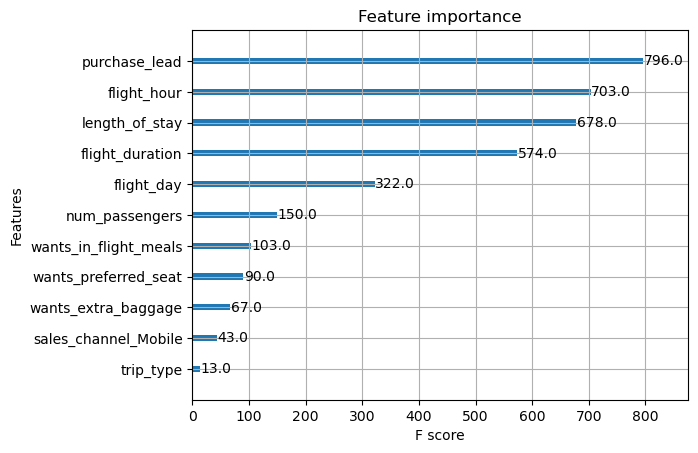

In [94]:
xgb.plot_importance(clf );